In [2]:
# Load packages and data.

# Packages for data manipulation and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for data modelling. 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

%matplotlib inline

train = pd.read_csv("abusingDetectionTrainDataset.csv")
test = pd.read_csv("abusingDetectionTestDataset.csv")

In [3]:
# Inspect the data set.

train.shape

(104399, 44)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104399 entries, 0 to 104398
Data columns (total 44 columns):
newID                        104399 non-null int64
char_jobcode                 104399 non-null int64
char_level                   104399 non-null int64
logging_timestamp            104399 non-null object
charStatA                    104399 non-null int64
charStatB                    104399 non-null int64
charStatC                    104399 non-null int64
charStatD                    104399 non-null int64
charStatE                    104399 non-null int64
charStatF                    104399 non-null int64
charStatG                    104399 non-null int64
socialAmountA                104399 non-null int64
socialBooleanA               104399 non-null int64
socialBooleanB               104399 non-null int64
socialSessionAmountA         104399 non-null int64
activityCumulativeAmountA    104399 non-null int64
accountMetaAmountA           104399 non-null int64
charSessionAmountA   

In [5]:
# We can see that the data frame is made up of numerical data only. 

train.describe()

newID   char_jobcode     char_level      charStatA  \
count  104399.000000  104399.000000  104399.000000  104399.000000   
mean     7484.512150      35.396651      48.324553       0.070815   
std      4318.413739      21.345751      22.407708       1.017310   
min         0.000000       0.000000      10.000000     -10.000000   
25%      3763.000000      29.000000      31.000000       0.000000   
50%      7500.000000      30.000000      49.000000       0.000000   
75%     11254.000000      31.000000      61.000000       0.000000   
max     14915.000000     165.000000     159.000000      56.000000   

           charStatB      charStatC      charStatD      charStatE  \
count  104399.000000  104399.000000  104399.000000  104399.000000   
mean       39.750055     143.485100       0.631481      97.709269   
std       402.584594    1114.480669      11.328005     821.057198   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       6.000000   
max      4921.000000   11145.000000     570.000000   11402.000000   

           charStatF      charStatG      ...        actionSessionAmountH  \
count  104399.000000  104399.000000      ...               104399.000000   
mean       16.134082      72.420119      ...                    0.026868   
std       264.802276     817.030460      ...                    0.162408   
min         0.000000       0.000000      ...                    0.000000   
25%         0.000000       0.000000      ...                    0.000000   
50%         0.000000       0.000000      ...                    0.000000   
75%         0.000000       0.000000      ...                    0.000000   
max      5038.000000   15302.000000      ...                    2.000000   

       actionSessionAmountI  actionSessionAmountJ  actionSessionAmountK  \
count         104399.000000         104399.000000         104399.000000   
mean               2.703762              0.199437              0.496624   
std                2.423407              0.880222              2.190545   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                2.000000              0.000000              0.000000   
75%                5.000000              0.000000              0.000000   
max               11.000000            179.000000            172.000000   

       actionSessionAmountL  actionSessionAmountM  actionSessionAmountN  \
count         104399.000000         104399.000000         104399.000000   
mean             700.909013              0.000766           1219.530082   
std              962.844386              0.104952           1095.172136   
min                0.000000              0.000000              0.000000   
25%               61.000000              0.000000            222.000000   
50%              202.000000              0.000000           1030.000000   
75%             1114.000000              0.000000           1971.000000   
max            23333.000000             26.000000           5745.000000   

       tradeSessionAmountD  tradeSessionAmountE        blocked  
count        104399.000000             104399.0  104399.000000  
mean              0.054972                  0.0       0.598282  
std               0.448240                  0.0       0.490248  
min               0.000000                  0.0       0.000000  
25%               0.000000                  0.0       0.000000  
50%               0.000000                  0.0       1.000000  
75%               0.000000                  0.0       1.000000  
max              39.000000                  0.0       1.000000  

[8 rows x 43 columns]

In [7]:
# Check for nulls.

train.apply(lambda x: sum(x.isnull()))

newID                        0
char_jobcode                 0
char_level                   0
logging_timestamp            0
charStatA                    0
charStatB                    0
charStatC                    0
charStatD                    0
charStatE                    0
charStatF                    0
charStatG                    0
socialAmountA                0
socialBooleanA               0
socialBooleanB               0
socialSessionAmountA         0
activityCumulativeAmountA    0
accountMetaAmountA           0
charSessionAmountA           0
charSessionAmountB           0
charMoveSessionAmountA       0
charSessionAmountC           0
socialSessionAmountB         0
actionSessionAmountA         0
charSessionAmountD           0
activityCumulativeAmountB    0
actionSessionAmountB         0
actionSessionAmountC         0
actionSessionAmountD         0
actionSessionAmountE         0
tradeSessionAmountA          0
tradeSessionAmountB          0
tradeSessionAmountC          0
actionSe

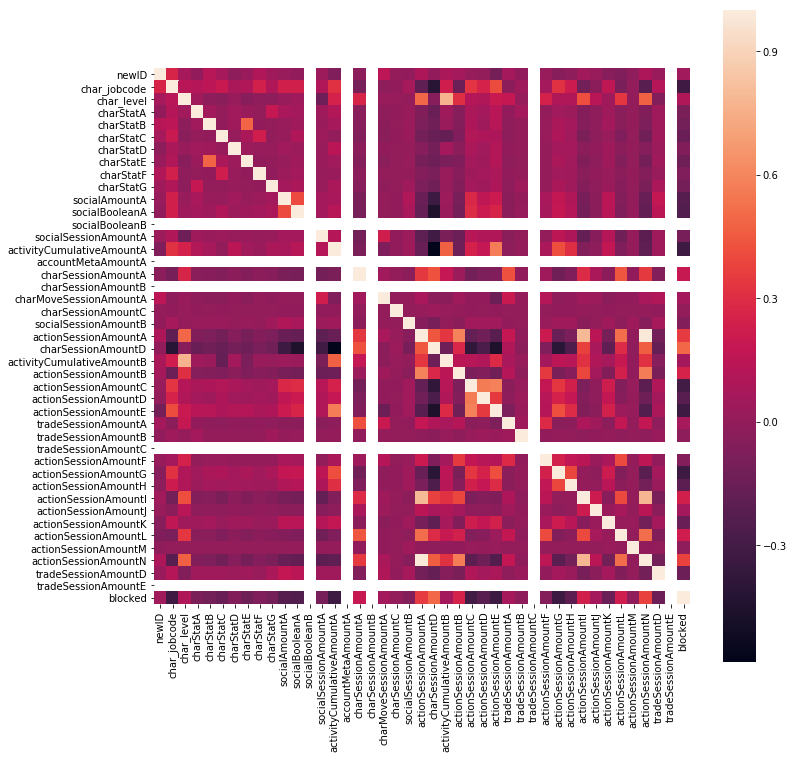

In [8]:
# Plot a heatmap using seaborn. 
corr = train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [10]:
# Show precise correlations with the target variable.

cor_dict = corr['blocked'].to_dict()
del cor_dict['blocked']
print("List the numerical features decendingly by their correlation with Outcome:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Outcome:

charSessionAmountD: 	0.4966915989760418
actionSessionAmountN: 	0.3762022599088116
actionSessionAmountA: 	0.3554489899236661
actionSessionAmountE: 	-0.33628935404313687
actionSessionAmountG: 	-0.3343178269998042
activityCumulativeAmountA: 	-0.32560120547849086
char_jobcode: 	-0.32236385357489167
actionSessionAmountC: 	-0.3053184839780264
actionSessionAmountB: 	0.2532401224768283
socialBooleanA: 	-0.2476133898535585
actionSessionAmountI: 	0.23513299735101229
socialAmountA: 	-0.22924541976285012
actionSessionAmountL: 	0.2245204043888173
actionSessionAmountD: 	-0.21707171309552503
actionSessionAmountH: 	-0.20153310597505938
charSessionAmountA: 	0.19293175456749165
charStatC: 	-0.1571083343231194
actionSessionAmountK: 	-0.15132894810011674
tradeSessionAmountD: 	-0.14962259047269744
charStatE: 	-0.14224051915671995
charStatB: 	-0.11528258110066195
charStatG: 	-0.10817182487769517
char_level: 	0.10775932167472374
soci

In [12]:
# Plot a pairplot using seaborn.

sns.pairplot(train)

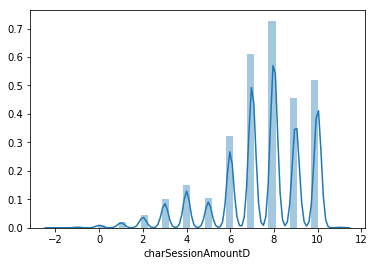

In [40]:
sns.distplot(train.charSessionAmountD, bins=40)

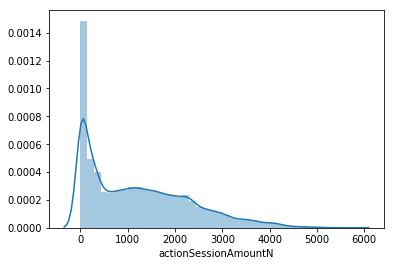

In [41]:
sns.distplot(train.actionSessionAmountN, bins = 40)

blocked
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: charSessionAmountD, dtype: object

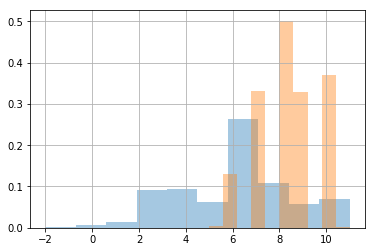

In [42]:
train.groupby('blocked').charSessionAmountD.hist(alpha=0.4,density=True)

In [36]:
# Let's make our data ready for modelling. 

# Separate the target and features.
x_target = train.blocked
drop_list = ['blocked', 'logging_timestamp', 'charStatB', 'charStatG', 'char_level', 'socialSessionAmountA', 'charStatA', 'charStatF', 'tradeSessionAmountA', 'charStatD', 'socialSessionAmountB', 'actionSessionAmountJ', 'charMoveSessionAmountA', 'actionSessionAmountF', 'newID', 'socialBooleanB', 'accountMetaAmountA', 'charSessionAmountB', 'activityCumulativeAmountB', 'tradeSessionAmountB', 'actionSessionAmountM', 'charSessionAmountC', 'tradeSessionAmountC', 'tradeSessionAmountE']
features = train
for i in drop_list:
    features = features.drop(i, axis=1)

# The column names will be used later to help us make sense of the models.
cols = features.columns.values

In [37]:
features

char_jobcode  charStatC  charStatE  socialAmountA  socialBooleanA  \
0                  0          0          0              0               0   
1                  0          0          2              0               0   
2                  0          0          2              0               0   
3                  0          0          6              0               0   
4                  0          0          6              0               0   
5                  0          0          6              0               0   
6                  0          0          8              0               0   
7                  0          0          8              0               0   
8                  0          0         12              0               0   
9                  0          0         12              0               0   
10                 0          0          0              0               0   
11                 0          0          2              0               0   
12                 0          0          2              0               0   
13                 0          0          2              0               0   
14                 0          0          2              0               0   
15                 0          0          2              0               0   
16                 0          0          2              0               0   
17                 0          0          2              0               0   
18                 0          0          2              0               0   
19                 0          0          2              0               0   
20                 0          0          0              1               0   
21                 0          0          0              1               0   
22                 0          0          0              2               0   
23                 0          0          0              2               0   
24                 0          0          2              2               0   
25                 0          0          2              2               0   
26                 0          0          6              2               1   
27                 0          0          6              2               1   
28                 0          0         12              2               1   
29                 0          0         12              2               1   
...              ...        ...        ...            ...             ...   
104369           120       4563       4565              0               1   
104370           120       4563       4569              0               1   
104371           121       4563       4569              0               1   
104372           121       4563       4569              0               1   
104373           121       4563       4569              0               1   
104374           121       4563       4569              0               1   
104375           121       4563       4569              0               1   
104376           121       4563       4571              0               1   
104377           132       4563       4563              0               0   
104378           132       4563       4565              0               1   
104379           120       4563       4563              1               0   
104380           120       4563       4563              1               0   
104381           120       4563       4565              1               0   
104382           120       4563       4565              2               0   
104383           120       4563       4565              2               0   
104384           120       4563       4567              2               0   
104385           120       4563       4567              2               0   
104386           120       4563       4571              2               0   
104387           120       4563       4571              2               0   
104388           132       4563       4563              0               0   
1043

In [34]:
# Standardize features by removing the mean and scaling to unit variance.
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)

In [50]:
from sklearn.model_selection import train_test_split
train_x, train_target, validation_x, validation_target = train_test_split(features, x_target, test_size=0.33, random_state=42)

In [51]:
## linear model
def log_reg_model(train_x, train_target, validation_x, validation_target):
    if __name__ == '__main__':

        param_grid = {'penalty' : ['l1', 'l2'],
                      'C' : [0.001, 0.01, 0.1, 1, 10]}

        classifier = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=3)

        classifier.fit(train_x, validation_x)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(train_target, validation_target)
        
        print('Validation accuracy: ', validation_accuarcy)

        coefficients = classifier.best_estimator_.coef_
        print('Coefficients: ', list(zip(cols, coefficients[0])))

In [53]:
#Find model with best paramters.

log_reg_model(train_x, train_target, validation_x, validation_target)

Best parameters:  {'C': 10, 'penalty': 'l1'}
Validation accuracy:  0.8222454429350982
Coefficients:  [('char_jobcode', -0.029985630541951046), ('charStatC', -0.06287216372463754), ('charStatE', -0.034011833097583384), ('socialAmountA', -4.788971513274705), ('socialBooleanA', -7.330088847270663), ('activityCumulativeAmountA', -0.01478813565960071), ('charSessionAmountA', -0.0034498958555829926), ('actionSessionAmountA', 0.00016291295694823862), ('charSessionAmountD', 0.0804126605497134), ('actionSessionAmountB', 0.0004204443866409195), ('actionSessionAmountC', -2.4980009694433525), ('actionSessionAmountD', -4.599172294359742), ('actionSessionAmountE', 0.013702059207626058), ('actionSessionAmountG', -8.194784462815518), ('actionSessionAmountH', -2.835151612914887), ('actionSessionAmountI', -0.034734991941223134), ('actionSessionAmountK', -0.00814730168722528), ('actionSessionAmountL', 0.00016592582815555128), ('actionSessionAmountN', -5.454895620055963e-05), ('tradeSessionAmountD', -5.94

In [54]:
def svc_model(train_x, train_target, validation_x, validation_target):
    if __name__ == '__main__':

        param_grid = {'C':[0.001, 0.01, 0.1, 1.0],
                      'class_weight':[None, 'balanced']}

        classifier = GridSearchCV(estimator=LinearSVC(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=3)

        classifier.fit(train_x, validation_x)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(train_target, validation_target)
        
        print('Validation accuracy: ', validation_accuarcy)

        coefficients = classifier.best_estimator_.coef_
        print('Coefficients: ', list(zip(cols, coefficients[0])))

In [55]:
svc_model(train_x, train_target, validation_x, validation_target)

Best parameters:  {'C': 0.01, 'class_weight': None}
Validation accuracy:  0.7688087774294671
Coefficients:  [('char_jobcode', -0.011065630949756215), ('charStatC', -0.016688605102296927), ('charStatE', -0.02943601740769443), ('socialAmountA', -0.9991593908384554), ('socialBooleanA', -0.48240251636713083), ('activityCumulativeAmountA', -0.0031912440244056197), ('charSessionAmountA', -0.02713196540946318), ('actionSessionAmountA', -0.00028946806293068993), ('charSessionAmountD', 0.07243085468044198), ('actionSessionAmountB', 0.0009580265547083038), ('actionSessionAmountC', -0.19557508252405748), ('actionSessionAmountD', -0.13964485954986516), ('actionSessionAmountE', 0.03657832847519597), ('actionSessionAmountG', -0.4705677482035792), ('actionSessionAmountH', -0.11530899157949225), ('actionSessionAmountI', -0.0804074430936114), ('actionSessionAmountK', -0.044666494277206335), ('actionSessionAmountL', 0.000480913979866092), ('actionSessionAmountN', 0.00025886367399183805), ('tradeSessionA

In [56]:
def gradient_boosting_model(train_x, train_target, validation_x, validation_target):
    if __name__ == '__main__':

        param_grid = {'learning_rate': [0.015, 0.013, 0.011],
                      'max_depth': [20, 25, None],
                      'min_samples_leaf': [9, 10, 11],
                      'max_features': [0.25, 0.27, 0.3],
                      'n_estimators': [225, 250, 235]} 

        classifier = GridSearchCV(estimator=GradientBoostingClassifier(),
                                  param_grid=param_grid,
                                  n_jobs=-1,
                                  cv=5)

        classifier.fit(train_x, validation_x)

        best_params = classifier.best_params_

        print('Best parameters: ', best_params)

        validation_accuarcy = classifier.score(train_target, validation_target)
        
        print('Validation accuracy: ', validation_accuarcy)

        feature_importances = classifier.best_estimator_.feature_importances_
        
        print('Feature importances: ', feature_importances)

In [ ]:
gradient_boosting_model(train_x, train_target, validation_x, validation_target)